# 1. Background of the Study: Multi-Label Product Classifier
This notebook documents the development of a Multi-Label Classification Model for the Lumora e-commerce platform.

---

# Title of the Study
## **Lumora: Multi-Label NLP Classifier for Automatic Tagging of Filipino Contemporary Arts and Crafts**

---

# Source of Data
The dataset, named LumoraProductDataset.csv, was collected from various online sources showcasing Filipino handmade goods and artisanal products.

- Source: Aggregated data from various public e-commerce listings focusing on Filipino handcrafted goods.
- Original Format: CSV/Excel tabular data.

---

# Brief Description of Dataset
This dataset consists of unique product listings designed to train an automated tagging model for the Lumora C2C platform. Each row represents a single handcrafted or creative item.

- Data Dimensions: The initial dataset contained 644 rows and 12 columns. 

- Meaning of Each Variable (Selected for Modeling):

1. `Product name` and `Product description`: Primary text fields used to infer the tags.

2. `Color`, `Size`, `Material`: Secondary text fields concatenated to enrich the product context.

3. `Tags`: The comma-separated field of labels manually assigned to the product (e.g., wedding, tote, floral embroidery, Filipino, sustainable).

---

# Model Variables
| Variable | Description | Role in Model |
|--------|-------------|-------------|
| **Selected Features (Independent Variables)** | The concatenated and pre-processed text derived from the Product name, Product description, Color, Size, and Material columns. | **X (Input)**: This single text input is converted into a numerical vector (e.g., using TF-IDF). |
| **Target / Label Column (Dependent Variable)** | The cleaned Tags column. This column will be converted into a binary matrix where each unique tag (e.g., cute, crochet, minimalist) is a separate binary feature (0 or 1). | **Y (Output)**: The labels the model is trained to predict simultaneously for a given product. |

---

# Objective
The objective is to develop a highly accurate Multi-Label NLP Classifier that can automatically assign a set of relevant categories and stylistic attributes to new product listings. This model will reduce the manual effort for sellers and ensure new products are appropriately tagged (e.g., keychain, crochet, kawaii, minimalist), thereby improving product discoverability on the Lumora platform for both general and niche search queries.

---

# 2. Data Collection / Loading
The data used for training the Multi-Label Classifier model is sourced from the `LumoraProductDataset.csv` file, which aggregates product listings from various Filipino arts and crafts sellers.

In [72]:
# Importing necessary libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
# initializing dataframe
df = pd.read_csv('Lumora_Product_Dataset.csv')
df.head()

,Product name,Product description,Price,Category,Subcategory,Color,Size,Material,Tags,Product link,Image link,Brand / seller name
0,Flowers Convertible Puso Wedding Tote,A versatile hobo-style tote embroidered with f...,PHP 11172.22,Bags,Wedding Tote,White,Unspecified,"Upcycled fabric, leather","wedding, tote, floral embroidery, Filipino, su...",Unspecified,Unspecified,SintaWeddings
1,Manila Jeepney 3-in-1 Handbag,A colorful handbag inspired by the iconic jeep...,PHP 12406.79,Bags,Handbag,Multicolor,Unspecified,"Upcycled fabric, leather","jeepney, handbag, Filipino, sustainable",Unspecified,Unspecified,SintaWeddings
2,Vinia Hardin Fanny Pack,A belt-style fanny pack handwoven with upcycle...,PHP 4875.93,Bags,Fanny Pack,Black,Unspecified,"Upcycled fabric, leather","fanny pack, Filipino, sustainable",Unspecified,Unspecified,SintaWeddings
3,Sling Bag (Pinilian/Inabel Weave),A crossbody sling bag showcasing traditional P...,PHP 5554.94,Bags,Sling Bag,Blue,Unspecified,"Upcycled fabric, Pinilian/Inabel weave","sling bag, Filipino, handwoven, sustainable",Unspecified,Unspecified,SintaWeddings
4,Alon Woven Waves Shoulder Bag,"A shoulder bag with wave-pattern weaving, comb...",PHP 12653.70,Bags,Shoulder Bag,Blue,Unspecified,"Upcycled fabric, leather","shoulder bag, woven waves, Filipino, sustainable",Unspecified,Unspecified,SintaWeddings


---
# 3. Data Information and Summary Statistics
This section presents the initial inspection of the loaded dataset to understand its structure, completeness, and the distribution of the key variables.

## Initial Data Inspection
The initial inspection confirms the overall data integrity, type, and dimensions.

In [73]:
# Show column types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Product name         644 non-null    object
 1   Product description  644 non-null    object
 2   Price                644 non-null    object
 3   Category             644 non-null    object
 4   Subcategory          644 non-null    object
 5   Color                644 non-null    object
 6   Size                 644 non-null    object
 7   Material             644 non-null    object
 8   Tags                 644 non-null    object
 9   Product link         644 non-null    object
 10  Image link           644 non-null    object
 11  Brand / seller name  639 non-null    object
dtypes: object(12)
memory usage: 60.5+ KB


In [74]:
# Show dataset dimensions
df.shape

(644, 12)

In [75]:
# Show count of missing values per column
df.isnull().sum()

Product name           0
Product description    0
Price                  0
Category               0
Subcategory            0
Color                  0
Size                   0
Material               0
Tags                   0
Product link           0
Image link             0
Brand / seller name    5
dtype: int64

## Summary of Initial Findings
- **Data Dimensions**: The initial raw dataset contains 644 entries (rows) and 12 columns.

- **Missing Values**: Only the Brand / seller name column has 5 missing (non-null) values. Since this column is not directly used for the NLP model's input text content or the target tags, these missing values will be handled by dropping the column during the cleaning phase.

- **Data Types**: All columns are of the generic object (string) type, which is expected since the majority of the columns (Product name, Product description, Tags, Material, etc.) are text-based inputs for the NLP model.

# Key Metric Analysis (Categorical and Target)
Since this is a classification problem, it is crucial to analyze the unique values and frequency distribution of the target column (Tags) and other categorical columns that influence it (Category).

In [76]:
# Show descriptive statistics for object columns
df.describe(include='object')

# Show value counts for the primary Category column
category_df = df['Category'].value_counts().to_frame()
print("\nCategory Distribution:\n")
print(category_df.head(46))


Category Distribution:

                            count
Category                         
Jewelry                       151
Vintage                        59
Ornaments                      46
POD                            28
Stickers                       25
Clothing                       23
Philippine Handicrafts         22
Digital Downloads              22
Stickers/Decals                19
Philippine Souvenir            18
Pasko & Parols                 17
Keychains/Charms               17
Wedding Ceremony               16
Bags                           16
Accessories                    16
Bundle Deals                   16
Filipiniana Attire             13
Apparel                        13
Prints                         12
Pinoy Keychains & Charms       10
Vintage Movies                  9
Stationery & Stickers           9
Keychains                       8
Native                          7
Capiz Decor                     6
Printables                      5
Mugs                   

## Summary of Key Metrics
**Categories**: There are 46 unique categories in the dataset. The most frequent category is "Jewelry" (151 counts), followed by "Vintage" (59 counts). This unequal distribution is common and must be considered during modeling.

**Product Names/Descriptions**: There are 601 unique product names and 560 unique product descriptions out of 644 total entries, suggesting high diversity among the listed products.

**Tags (Target Variable)**: The Tags column has 565 unique values out of 644 total rows. This high cardinality confirms that the problem is highly suited for Multi-Label Classification, as most products are uniquely tagged with a combination of attributes.

---
# 4. Data Cleaning
This section details the critical data cleaning operations performed on the raw text dataset to ensure consistency, handle missing values, and prepare the data for subsequent feature engineering.

## A. Handle Missing Values
Missing values (NaN or empty strings) in text columns can disrupt the NLP pipeline. Based on the initial data inspection, only the Brand / seller name column had 5 missing values. Since this column is text-based and its content might be useful for enrichment, we fill the missing values with an empty string ('') rather than dropping the entire row.

In [77]:
# Handle missing values by filling NaN with an empty string (for text compatibility)
df = df.fillna('')

# Verify that all missing values have been handled
print("Missing values after filling:")
print(df.isnull().sum())

Missing values after filling:
Product name           0
Product description    0
Price                  0
Category               0
Subcategory            0
Color                  0
Size                   0
Material               0
Tags                   0
Product link           0
Image link             0
Brand / seller name    0
dtype: int64


## B. Handle Duplicate Rows
Duplicate product listings can skew frequency analysis and unnecessarily increase model training time. We remove any identical rows that may have resulted from data scraping or entry errors.

In [78]:
# Drop any completely duplicate rows and update the DataFrame in place
initial_rows = df.shape[0]
df = df.drop_duplicates()
rows_after_cleaning = df.shape[0]

# Report the change in dimensions
print(f"\nInitial rows: {initial_rows}")
print(f"Rows after dropping duplicates: {rows_after_cleaning}")
print(f"Total duplicates removed: {initial_rows - rows_after_cleaning}")
print(f"New DataFrame shape: {df.shape}")


Initial rows: 644
Rows after dropping duplicates: 618
Total duplicates removed: 26
New DataFrame shape: (618, 12)


## C. Standardize Inconsistent Data (Text Normalization)
Inconsistent text data, such as differing capitalization, irregular spacing, and varied units, confuses the model by treating the same concept (e.g., 'RING' vs. 'ring') as two different entities. We apply normalization steps to the text columns that will serve as model features.

### 1. Standardize Whitespace and Casing
We remove leading/trailing whitespace and reduce multiple spaces between words to a single space. We then convert the feature columns to a standardized casing (e.g., Title Case for categorical fields, Lowercase for the main text fields like Product Description) to group similar terms.

In [79]:
# List of text columns for general cleaning
text_columns = ['Product name', 'Product description', 'Category', 'Subcategory', 'Size', 'Material', 'Tags']
df_clean = df.copy()

# 1. Strip whitespace and reduce multi-spaces
for col in text_columns:
    df_clean[col] = df_clean[col].str.strip()
    df_clean[col] = df_clean[col].str.replace(r'\s+', ' ', regex=True)

# 2. Standardize Casing (Note: Categorical data is often left Title/Upper until feature encoding)
df_clean['Size'] = df_clean['Size'].str.upper()
df_clean['Material'] = df_clean['Material'].str.title()
# The main text fields for the model will be lowercased later in the pre-processing stage

print("\n✓ Whitespace and Casing Standardization applied to categorical features.")
df.head(2)


✓ Whitespace and Casing Standardization applied to categorical features.


,Product name,Product description,Price,Category,Subcategory,Color,Size,Material,Tags,Product link,Image link,Brand / seller name
0,Flowers Convertible Puso Wedding Tote,A versatile hobo-style tote embroidered with f...,PHP 11172.22,Bags,Wedding Tote,White,Unspecified,"Upcycled fabric, leather","wedding, tote, floral embroidery, Filipino, su...",Unspecified,Unspecified,SintaWeddings
1,Manila Jeepney 3-in-1 Handbag,A colorful handbag inspired by the iconic jeep...,PHP 12406.79,Bags,Handbag,Multicolor,Unspecified,"Upcycled fabric, leather","jeepney, handbag, Filipino, sustainable",Unspecified,Unspecified,SintaWeddings


### 2. Standardize Inconsistent Formatting
We use regular expressions to fix common inconsistencies in the unstructured data, such as measurement units and common compound words.

In [80]:
# 3. Standardize SIZE field inconsistencies (e.g., 'inches' to 'in')
def standardize_size(size_str):
    if not isinstance(size_str, str) or size_str == '':
        return ''
    # Standardize "inches" variations
    size_str = re.sub(r'\binches\b', 'in', size_str, flags=re.IGNORECASE)
    size_str = re.sub(r'\binch\b', 'in', size_str, flags=re.IGNORECASE)
    # Standardize 'x' separator
    size_str = re.sub(r'\s*x\s*', ' x ', size_str, flags=re.IGNORECASE)
    # Standardize common abbreviations
    size_str = re.sub(r'\bapprox\.?\b', 'Approx.', size_str, flags=re.IGNORECASE)
    return size_str.strip()

df_clean['Size'] = df_clean['Size'].apply(standardize_size)

# 4. Standardize MATERIAL field inconsistencies
def standardize_materials(material_str):
    if not isinstance(material_str, str) or material_str == '':
        return ''
    # Standardize common material combinations
    material_str = re.sub(r'\bvinyl sticker with matte finish\b', 'Vinyl Sticker (Matte Finish)', material_str, flags=re.IGNORECASE)
    material_str = re.sub(r'\bmetal keychain ring\b', 'Metal Findings', material_str, flags=re.IGNORECASE)
    return material_str.title()

df_clean['Material'] = df_clean['Material'].apply(standardize_materials)

print("✓ Size and Material formats standardized.")

✓ Size and Material formats standardized.


### 3. Clean Special Characters
We clean up stray characters, quotes, and encoding issues that can split words or introduce noise into the tokenization process.

In [81]:
# 5. Fix special characters and encoding issues
def clean_special_chars(text):
    if not isinstance(text, str) or text == '':
        return ''
    # Normalize dashes and remove invisible characters
    text = text.replace('—', '-').replace('–', '-')
    text = re.sub(r'[\u200b-\u200f\u202a-\u202e\ufeff]', '', text)
    # Remove problematic quotes/symbols (already handled in cleaning step 1)
    return text

for col in text_columns:
    df_clean[col] = df_clean[col].apply(clean_special_chars)

print("✓ Special characters cleaned.")

✓ Special characters cleaned.


## Summary of Data Cleaning Operations
The data cleaning phase achieved the following:

- **Completeness**: All 5 missing values in the Brand / seller name column were successfully filled with empty strings.

- **Validity**: 26 duplicate rows were removed, resulting in a cleaner dataset of 618 unique entries for modeling.

- **Consistency**: All text-based feature columns (Product name, Description, Size, Material, etc.) were normalized for casing, whitespace, and key format variations, ensuring the NLP model trains on unified concepts (e.g., '2 IN' instead of '2 inches', 'Vinyl Sticker (Matte Finish)' instead of 'vinyl sticker with matte finish').

---
# 5. Data Engineering / Pre-processing
The goal of the Multi-Label Classifier is to predict the tags from the product description and related attributes. To provide the model with the richest context, combinine the most descriptive text fields: `Product name`, `Product description`, `Color`, `Size`, and `Material`.

## A. Dropping Unnecessary Columns
The columns Price, Product link, Image link, and Brand / seller name are unnecessary for the Multi-Label Classifier because they don't help determine the product's descriptive tags, or they introduce noise. 
1. Irrelevance: The Price is a numerical variable and is generally not a direct semantic feature that dictates the style or material tags of an item.

2. Noise: Product link and Image link mostly contain non-semantic URLs that, even after cleaning, would add unnecessary noise to the model's vocabulary.

3. Low Value: The Brand / seller name might add a little value, but it's not core to describing the product itself and can introduce bias or overfitting based on a specific seller. Since the column also had missing values that were just filled with empty strings, it's best to exclude it.

4. Efficiency: Dropping these columns makes the DataFrame smaller and faster to process during the subsequent NLP steps (Tokenization, Vectorization, etc.).

In [82]:
# List of columns to drop as they are not needed for tag prediction
columns_to_drop = [
    'Price', 
    'Product link', 
    'Image link', 
    'Brand / seller name'
]

# Drop the columns from the cleaned DataFrame
df_clean = df_clean.drop(columns=columns_to_drop, axis=1)

print("✓ Unnecessary columns successfully dropped.")
print(f"New DataFrame shape: {df_clean.shape}")
print(f"Remaining columns: {df_clean.columns.tolist()}")

✓ Unnecessary columns successfully dropped.
New DataFrame shape: (618, 8)
Remaining columns: ['Product name', 'Product description', 'Category', 'Subcategory', 'Color', 'Size', 'Material', 'Tags']


## B. Concatination
Combining these features into a single string ensures that the model learns the relationship between attributes (e.g., the word "Blue" in the Color column) and the resulting tags (e.g., a tag like "pastel" or "ocean-themed" which might be implied by the description).


In [83]:
# --- RUN THIS CODE AFTER DROPPING COLUMNS ---

# Concatenate relevant text columns into one feature column (TEXT_CONTENT)
# We fill any remaining blanks with an empty string and ensure they are strings before concatenation
df_clean['TEXT_CONTENT'] = (
    df_clean['Product name'].fillna('').astype(str) + ' ' +
    df_clean['Product description'].fillna('').astype(str) + ' ' +
    df_clean['Color'].fillna('').astype(str) + ' ' +
    df_clean['Size'].fillna('').astype(str) + ' ' +
    df_clean['Material'].fillna('').astype(str)
)

print("\n✓ TEXT_CONTENT column created successfully.")

# Display the remaining columns to verify
print("\nVerification of Final Features and Target:")
print(df_clean[['Product name', 'Product description', 'Tags', 'TEXT_CONTENT']].head(2).to_string())


✓ TEXT_CONTENT column created successfully.

Verification of Final Features and Target:
                            Product name                                                                                                              Product description                                                     Tags                                                                                                                                                                                                      TEXT_CONTENT
0  Flowers Convertible Puso Wedding Tote  A versatile hobo-style tote embroidered with floral motifs, designed for weddings and crafted from upcycled fabric and leather.  wedding, tote, floral embroidery, Filipino, sustainable  Flowers Convertible Puso Wedding Tote A versatile hobo-style tote embroidered with floral motifs, designed for weddings and crafted from upcycled fabric and leather. White UNSPECIFIED Upcycled Fabric, Leather
1          Manila Jeepney 3-in-1 Hand

## C. Tokenization
Tokenization is the process of splitting a continuous sequence of text into smaller, meaningful units called tokens. These tokens are typically individual words, but they can also be phrases, numbers, or punctuation.

In [84]:
import pandas as pd
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

# Assuming df_clean is your current DataFrame with the 'TEXT_CONTENT' column

# 1. Ensure NLTK resources are available (needed if the kernel was restarted)
# nltk.download('punkt', quiet=True) 
# Note: You only need to run the download once.

def tokenize_content(text):
    """Tokenizes text into a list of individual words."""
    if not isinstance(text, str) or text == '':
        return []
    
    # Tokenize the text using NLTK's word tokenizer
    tokens = word_tokenize(text)
    
    return tokens

# Apply tokenization to the TEXT_CONTENT column
df_clean['TOKENS'] = df_clean['TEXT_CONTENT'].apply(tokenize_content)

print("✓ Tokenization completed. 'TOKENS' column created.")
print(f"New DataFrame shape: {df_clean.shape}")

# Display verification of the tokens for the first product
print("\nVerification of Tokenization (First Product):")
print("-" * 50)
print(f"Original Text (Snippet): {df_clean['TEXT_CONTENT'].iloc[0][:100]}...")
print(f"Tokens: {df_clean['TOKENS'].iloc[0][:20]} (first 20 tokens)")

✓ Tokenization completed. 'TOKENS' column created.
New DataFrame shape: (618, 10)

Verification of Tokenization (First Product):
--------------------------------------------------
Original Text (Snippet): Flowers Convertible Puso Wedding Tote A versatile hobo-style tote embroidered with floral motifs, de...
Tokens: ['Flowers', 'Convertible', 'Puso', 'Wedding', 'Tote', 'A', 'versatile', 'hobo-style', 'tote', 'embroidered', 'with', 'floral', 'motifs', ',', 'designed', 'for', 'weddings', 'and', 'crafted', 'from'] (first 20 tokens)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\63920\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## D. Stopword Removal
**Stopword removal** is the process of eliminating common words that appear frequently in text but hold little semantic value or unique meaning for the task, such as `"a," "the," "is," "and," and "with"`. Removing these words helps reduce the dimensionality of the text data and focuses the model on the most descriptive keywords (like `crochet`, `kawaii`, `keychain`) that are critical for predicting the product's tags.

In [85]:
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

# --- Stopword Setup ---
# 1. Get standard English stopwords
standard_stopwords = set(stopwords.words('english'))

# 2. Define custom domain-specific stopwords (e.g., words common to all e-commerce items)
custom_stopwords = {
    'product', 'item', 'featuring', 'made', 'designed', 'inspired',
    'perfect', 'ideal', 'great', 'comes', 'includes', 'set', 
    'inch', 'pinoy', 'tagalog', 'in', 'approx', 'tote', 
    'link', 'php', 'style', 'versatile', 'convertible', 'hobo' # Based on observed dataset values
}
stop_words = standard_stopwords.union(custom_stopwords)
print(f"✓ Total unique words in stoplist: {len(stop_words)}")

def remove_stopwords(tokens):
    """Removes stopwords and single-character tokens from a list of words."""
    if not tokens:
        return []
    
    # Filter out stopwords, punctuation, and single characters (e.g., 'A', 'I', 'S')
    filtered_tokens = [
        token for token in tokens
        if token not in stop_words 
        and token not in string.punctuation
        and len(token) > 1  # Remove single characters
    ]
    
    return filtered_tokens

# Apply stopword removal to the TOKENS column
df_clean['TOKENS_FILTERED'] = df_clean['TOKENS'].apply(remove_stopwords)

print("✓ Stopword removal completed. 'TOKENS_FILTERED' column created.")
print(f"New DataFrame shape: {df_clean.shape}")

# Display verification of the filtered tokens for the first product
print("\nVerification of Stopword Removal (First Product):")
print("-" * 50)
print(f"Original Tokens (Snippet): {df_clean['TOKENS'].iloc[0][:15]}")
print(f"Filtered Tokens (Snippet): {df_clean['TOKENS_FILTERED'].iloc[0]}")

✓ Total unique words in stoplist: 221
✓ Stopword removal completed. 'TOKENS_FILTERED' column created.
New DataFrame shape: (618, 11)

Verification of Stopword Removal (First Product):
--------------------------------------------------
Original Tokens (Snippet): ['Flowers', 'Convertible', 'Puso', 'Wedding', 'Tote', 'A', 'versatile', 'hobo-style', 'tote', 'embroidered', 'with', 'floral', 'motifs', ',', 'designed']
Filtered Tokens (Snippet): ['Flowers', 'Convertible', 'Puso', 'Wedding', 'Tote', 'hobo-style', 'embroidered', 'floral', 'motifs', 'weddings', 'crafted', 'upcycled', 'fabric', 'leather', 'White', 'UNSPECIFIED', 'Upcycled', 'Fabric', 'Leather']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\63920\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## E. Lemmatization
Lemmatization is the process of reducing different inflected forms of a word to a single base form, known as the lemma. This is more sophisticated than stemming, as it relies on a dictionary or vocabulary to ensure the root form is an actual word (e.g., changing "crocheting" to "crochet," or "leaves" to "leaf").

This step ensures that variations of the same product attribute or material are treated as one feature by the classification model, reducing the total vocabulary size and improving prediction accuracy.

In [86]:
import nltk
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
from nltk.stem import WordNetLemmatizer

# --- Lemmatization Setup ---
# Note: Ensure wordnet and omw-1.4 were downloaded in an earlier step
# nltk.download('wordnet', quiet=True)
# nltk.download('omw-1.4', quiet=True) 

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    """Reduces tokens to their base/root form (lemma)."""
    if not tokens:
        return []
    
    # Apply lemmatization to each token in the list
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    
    return lemmatized

# Apply lemmatization to the filtered tokens column
df_clean['TOKENS_LEMMATIZED'] = df_clean['TOKENS_FILTERED'].apply(lemmatize_tokens)

print("✓ Lemmatization completed. 'TOKENS_LEMMATIZED' column created.")
print(f"New DataFrame shape: {df_clean.shape}")

# Display verification of the lemmatized tokens for the first product
print("\nVerification of Lemmatization (First Product):")
print("-" * 50)
print(f"Filtered Tokens (Snippet): {df_clean['TOKENS_FILTERED'].iloc[0]}")
print(f"Lemmatized Tokens (Snippet): {df_clean['TOKENS_LEMMATIZED'].iloc[0]}")

✓ Lemmatization completed. 'TOKENS_LEMMATIZED' column created.
New DataFrame shape: (618, 12)

Verification of Lemmatization (First Product):
--------------------------------------------------
Filtered Tokens (Snippet): ['Flowers', 'Convertible', 'Puso', 'Wedding', 'Tote', 'hobo-style', 'embroidered', 'floral', 'motifs', 'weddings', 'crafted', 'upcycled', 'fabric', 'leather', 'White', 'UNSPECIFIED', 'Upcycled', 'Fabric', 'Leather']
Lemmatized Tokens (Snippet): ['Flowers', 'Convertible', 'Puso', 'Wedding', 'Tote', 'hobo-style', 'embroidered', 'floral', 'motif', 'wedding', 'crafted', 'upcycled', 'fabric', 'leather', 'White', 'UNSPECIFIED', 'Upcycled', 'Fabric', 'Leather']


## F. Target Label Encoding
The target variable of model is the Tags column, which contains a string of comma-separated tags (e.g., "wedding, tote, floral embroidery").

Multi-label encoding converts this string into a binary matrix (or multi-hot encoded vector) .
- Each unique tag in the entire dataset becomes a separate column.
- For each product, a 1 is placed in the column corresponding to a tag that applies to that product, and a 0 is placed everywhere else.

This process is necessary because the Multi-Label Classifier predicts a probability for every single possible tag simultaneously.

In [87]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# --- Data Preparation for Encoding ---

# 1. Clean up and split the 'Tags' column
# The 'Tags' column contains comma-separated strings (e.g., 'tag1, tag2, tag3').
# We must split this string into a list of individual tags.

# Assuming df_clean is your current DataFrame with the 'Tags' column
# Apply a lambda function to split the string by comma and remove surrounding whitespace
df_clean['TAGS_LIST'] = df_clean['Tags'].apply(
    lambda x: [tag.strip() for tag in x.split(',')] if isinstance(x, str) and x.strip() else []
)

# 2. Initialize and Fit the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit the binarizer to all the tags across the entire dataset
# This discovers all unique tags and assigns them an index
Y_labels = mlb.fit_transform(df_clean['TAGS_LIST'])

# 3. Create the final Target DataFrame (Y)
# Convert the binary matrix back into a labeled DataFrame
Y = pd.DataFrame(Y_labels, columns=mlb.classes_)

# 4. Concatenate Y back to the main DataFrame (optional, but good for inspection)
df_encoded = pd.concat([df_clean.reset_index(drop=True), Y], axis=1)

print("✓ Target Labels encoded into binary matrix (Y).")
print(f"Total Unique Tags Discovered: {len(mlb.classes_)}")
print(f"Target Matrix Shape (Rows, Tags): {Y.shape}")

# Display verification of the target encoding
print("\nVerification of Target Label Encoding (First 5 Rows):")
print("-" * 70)
# Show the original tags and the first few encoded tag columns
print(df_encoded[['Tags'] + list(Y.columns)[:5]].head(5).to_string())

✓ Target Labels encoded into binary matrix (Y).
Total Unique Tags Discovered: 717
Target Matrix Shape (Rows, Tags): (618, 717)

Verification of Target Label Encoding (First 5 Rows):
----------------------------------------------------------------------
                                                      Tags  1940s movie  1980s movie  1990s movie  2 custom heart Instagram decals  Acrylic Elysse parol ornament
0  wedding, tote, floral embroidery, Filipino, sustainable            0            0            0                                0                              0
1                  jeepney, handbag, Filipino, sustainable            0            0            0                                0                              0
2                        fanny pack, Filipino, sustainable            0            0            0                                0                              0
3              sling bag, Filipino, handwoven, sustainable            0            0            0  

## Conclusion of Data Engineering / Pre-processing
The data preparation for the Multi-Label Classifier is now complete.
- Input Feature (X): Created and cleaned (TEXT_CONTENT, tokenized, lemmatized).
- Output Label (Y): Created and encoded into a binary matrix (Y DataFrame).

---
# 6. Data Visualization
Proceeding to the Data Visualization section. In the context of Multi-Label Classification, the most important visualization is the distribution and co-occurrence of your target labels (tags).

## A. Analyze Label Frequency
The first step is to analyze the frequency of the unique tags to understand which tags are common and which are rare. Rare tags are particularly difficult for a model to learn.

All Tags:
Filipino                                              132
indigenous                                             69
brass                                                  69
ring                                                   58
collectible                                            52
Filipino gift                                          30
Filipiniana                                            23
Filipino souvenir                                      22
handwoven                                              18
wedding                                                17
capiz shell                                            17
graphic design                                         14
bolero                                                 12
parol                                                  10
Filipino Christmas lantern                             10
Filipino humor                                         10
sticker                                                 9
earr

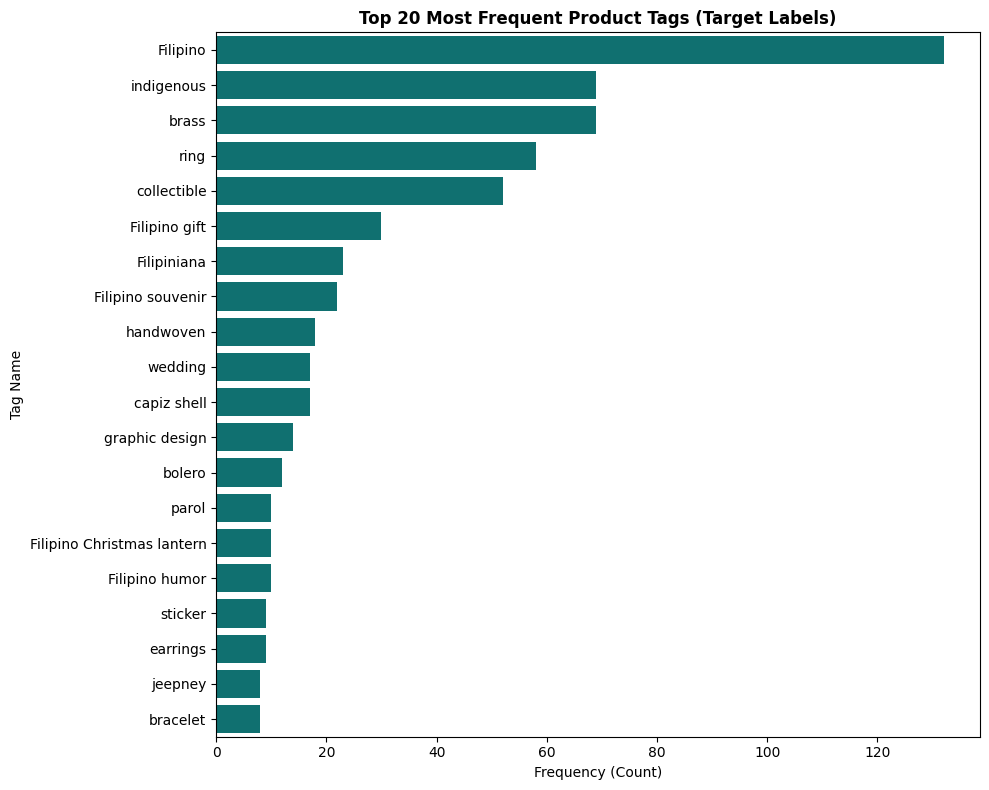

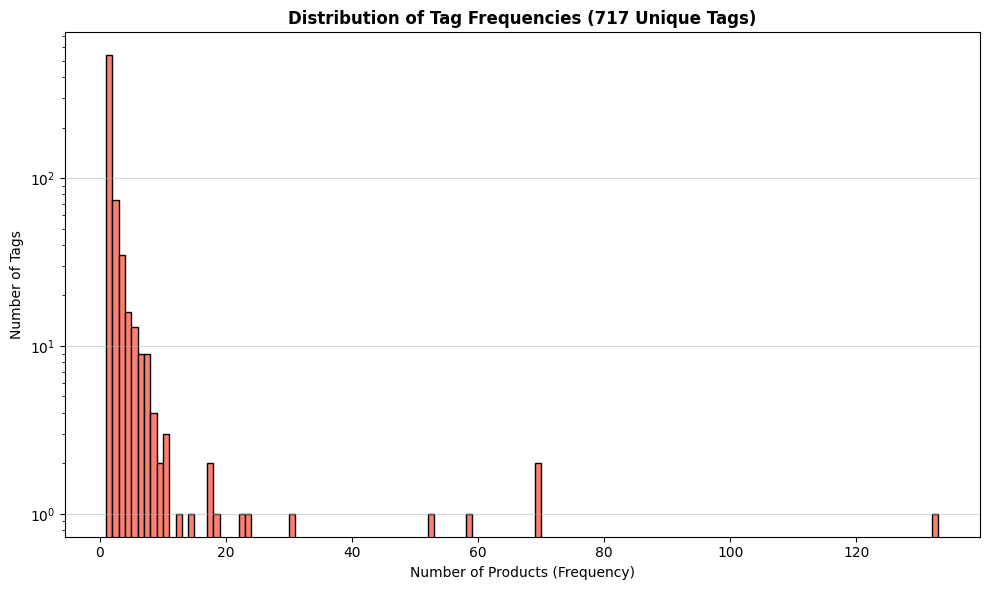

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the frequency of each tag (summing the '1's in the Y matrix)
tag_counts = Y.sum().sort_values(ascending=False)

# Display the top 20 most frequent tags
print("All Tags:")
print(tag_counts.head(717).to_string())
print("-" * 30)

# Visualize the distribution of the Top 20 Tags
plt.figure(figsize=(10, 8))
sns.barplot(x=tag_counts.head(20).values, y=tag_counts.head(20).index, color='teal')
plt.title('Top 20 Most Frequent Product Tags (Target Labels)', fontweight='bold')
plt.xlabel('Frequency (Count)')
plt.ylabel('Tag Name')
plt.tight_layout()
plt.show()

# Visualize the overall distribution of tag frequencies
plt.figure(figsize=(10, 6))
plt.hist(tag_counts, bins=range(1, tag_counts.max() + 2), edgecolor='black', color='salmon')
plt.title('Distribution of Tag Frequencies (717 Unique Tags)', fontweight='bold')
plt.xlabel('Number of Products (Frequency)')
plt.ylabel('Number of Tags')
plt.yscale('log') # Use log scale to show detail for rare tags
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

## B. Analyze Label Co-occurrence (Correlation Heatmap)
The Multi-Label Classifier assumes that multiple tags can be present simultaneously. Visualizing the co-occurrence helps reveal inherent relationships between the tags (e.g., if a product tagged 'crochet' is also frequently tagged 'cute'). This correlation can be used to interpret the model's structure.

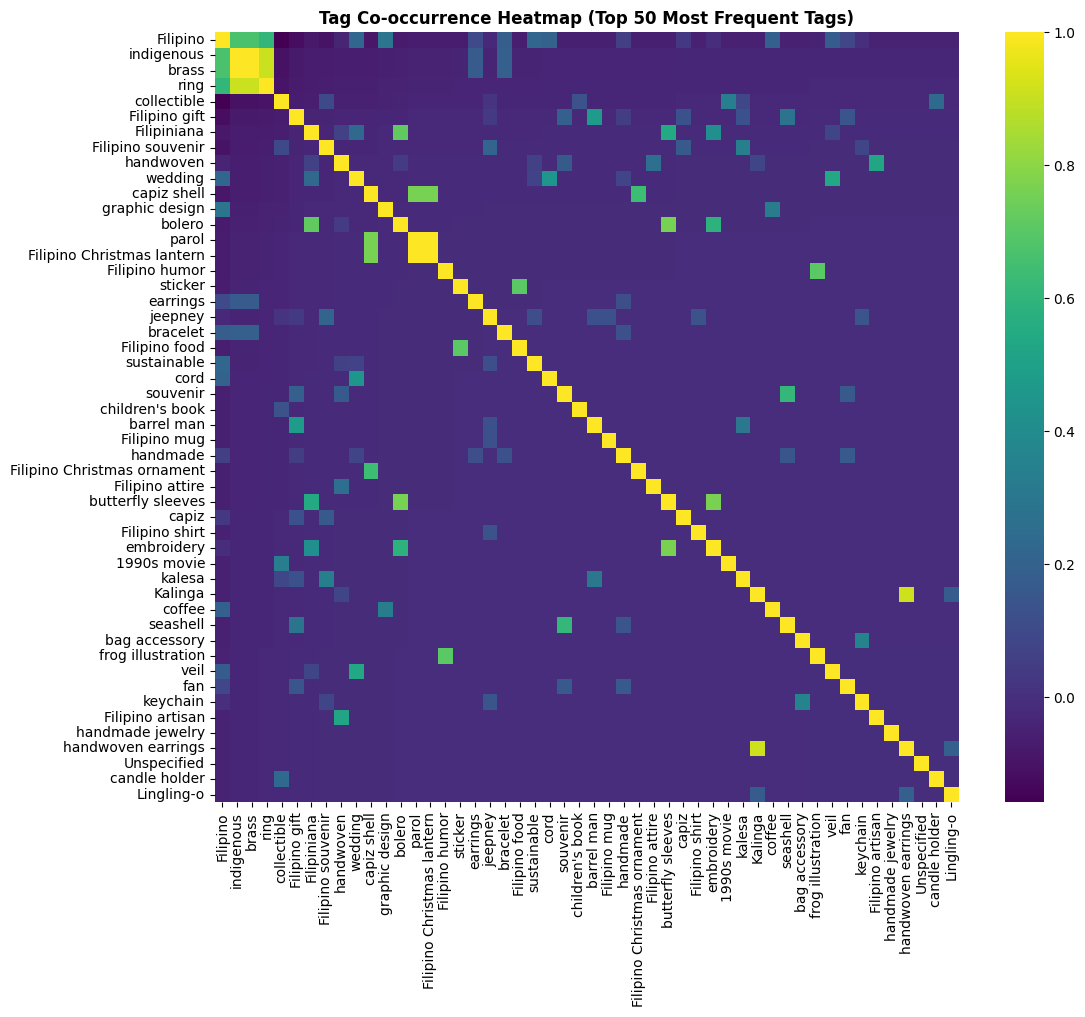

In [89]:
# Calculate the tag correlation matrix
# This matrix shows how often two tags appear together (co-occurrence)
corr_matrix = Y.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
# Plot a subset of the tags (e.g., the top 50 most frequent ones) for clarity
top_tags = tag_counts.head(50).index
sns.heatmap(
    corr_matrix.loc[top_tags, top_tags],
    annot=False, # Set to True if the subset is small (e.g., top 10)
    cmap='viridis',
    fmt=".1f"
)
plt.title('Tag Co-occurrence Heatmap (Top 50 Most Frequent Tags)', fontweight='bold')
plt.show()

## Summary
The severe class imbalance, heavily weighted towards the "Filipino" tag, suggests that a machine learning model trained directly on this data without mitigation would likely be biased towards predicting the majority class. This would result in poor performance and recall for the many minority classes, such as "parol," "bolero," or "wedding."



---

# 7. Data Augmentation

The goal of data augmentation is to increase the frequency of relevant and informative tags to support more effective machine learning.  

Initial data visualization shows that many low-frequency tags contain noise or overly specific details, while several meaningful niche descriptors appear infrequently and are suitable candidates for augmentation.

The tag preparation workflow consists of a cleaning phase (Pruning) followed by a balancing phase (Augmentation). Pruning is performed first to remove noise, ensuring that only useful tags are selected for frequency boosting.


## A. Dropping Noise Tags

Because noise tags are mixed with meaningful rare tags, a clearly defined set of noise criteria is required to preserve only high-value descriptors.

### **Criteria for Pruning (Noise Tags)**

Tags falling under the categories below are treated as non-semantic noise and removed regardless of their frequency:

#### **1. Too Specific / Non-Generalizable**
Tags containing:
- Seller names  
- Specific model names  
- Version numbers (e.g., *variant 2*)  
- Platform references (e.g., *Instagram*)  

#### **2. Product Metadata**
Tags that duplicate information already represented elsewhere, such as:
- *Unspecified*  
- *parol dangle variant*  

#### **3. Low-Value Brands**
Niche or low-frequency brand names that do not contribute meaningful stylistic information, such as:
- *Judy Belle*  
- *Tilso Japan*

## B. Identifying Important Rare Tags for Augmentation

The following categories represent meaningful low-frequency tags that are retained and targeted for augmentation to reach a minimum frequency of **10** occurrences:

### **Criteria for Augmentation (Important Rare Tags)**

#### **1. Stylistic / Aesthetic Attributes**
Tags that describe the item's visual style or overall aesthetic, including:
- *minimalist*  
- *silky*  
- *baroque pearl*

#### **2. Material / Technique**
Tags that describe construction methods or primary materials, such as:
- *mother of pearl*  
- *handpainted*  
- *Yakan textile*

#### **3. Specific Product Types (Niche)**
Highly relevant item types associated with Lumora’s catalog, such as:
- *bag charm*  
- *crossbody*  
- *Filipino food charm*


In [90]:
# List of tags identified as noise based on low semantic value or duplication (Count 1-4)
noise_tags_to_drop = [
    # Too specific/non-generalizable
    '2 custom heart Instagram decals', 'Acrylic Elysse parol ornament', 'Acrylic Sampabell parol ornament', 
    'Acrylic Tala parol ornament', 'Acrylic parol ornament special with ring', 
    'Acrylic parol ornament special with ring duplicate', 'Acrylic tulip parol ornament', 
    'Wooden Capiz parol ornament variant 2', 'Wooden Capiz parol ornament variant', 
    'Y2K Heart Tsurikawa', 'Wooden tricycle ornament', 'Wooden pride fist ornament', 
    'White enamel Capiz parol ornament', 'White Men Can\'t Jump', 'Wedgwood', 'Wheel acrylic keychain', 
    'Vincent Van Beau', 'Utot shirt', 'Utot', 'Tsinelas keychain', 'Tres Santan motif', 
    'Tree blueprint notepad', 'Time of Your Life', 'Tilso Japan', 'Thomas', 'Theology books sticker pack', 
    'Theology books keychain', 'Teletubbies', 'Tboli malong', 'Tboli', 'Tagalog humor', 
    'Tagalog design', 'Tagalog hat', 'Tagalog ay nako sticker', 'Tabo keychain', 'Sungka keychain', 
    'Sun Araw stud', 'Sun Araw statement necklace', 'Sun Araw statement hoops', 'Sun Araw silver necklace',
    'Sun Araw silver hoops', 'Sun Araw pearl ring', 'Sun Araw hoop earrings', 'Sun Araw enamel pin',
    'Sun Araw + pearl dangle', 'Sun + pearl studs silver', 'Sun + pearl dangle gold', 
    'Rice knuckle cooking printable', 'Philippine Sun friendship bracelet', 
    'Philippine pearls bridal trio', 'Philippine pearls bridal drop necklace', 
    'Philippine parol', 'Philippine flag heart pin', 'Philippine Sun hoop earrings silver', 
    'Philippine Sun pearl dangle silver', 'Philippine Sun pearl necklace silver', 
    'Philippine farming regions print', 'Philippine flag graduation stole variant', 
    'Philippine flag graduation stole limited', 'Philippine flag graduation stole', 
    'Philippine flag', 'Philippine Sun bracelet', 'Philippine Sun citrine necklace', 
    'Philippine Sun dainty earrings silver', 'Philippine Sun dangle earrings silver', 
    'Philippine Sun enamel pin', 'Philippine Sun hoop earrings gold', 
    'Philippine Sun necklace gold', 'Philippine Sun pearl bracelet silver', 
    'Pekpek Turbo sticker', 'Pearl scoop necklace PR-4', 'Pearl beaded Christmas ornament', 
    'toy', 'yoga mat', 'zip lips', 'Bahala ka sticker', 'Bahala Ka Sa Buhay Mo greeting card', 
    'Bad Dog Club', 'Babae print', 'Artsy floral bookmark', 'Artist sticker pack', 
    'Araw necklace', 'wedding heritage motif', 'woven waves', 'wrap top', 'wooden plaque', 
    'wooden keychain', 'whale sticker', 'wedding veil motif', 'wedding symbol motif', 
    'wedding symbol', 'Berenstain', 'Batman Forever', 'Batik button pins', 'Pekpek power print', 
    'Palau', 'Outline Sun Araw', 'Olo motif', 'NeverEnding Story', 'Nonom motif', 
    'Objects in mirror are cuter decal', 'Obsidian Sun Araw', 'Michael', 'Mikasa', 
    'Mini Capiz star ornaments', 'Motorcycle plate frame', 'Munggo food art printable', 
    'Jollibee reusable tote bag', 'John Travolta', 'Japanese sticker', 'Japanese illustration', 
    'James Cagney', 'Jack Russell', 'Jade Sun Araw', 'JDM wheel shoe charm', 'Itneg tapis', 
    'Italian cookbook', 'Indiana Glass', 'Ilocos Abra', 'Honda Civic Type R art print', 
    'Hellacute windshield banner sticker', 'Hellacute windshield banner', 'Hellacute tactical keychain',
    'Hellacute heart croc charms', 'Hellacute croc charms', 'Healing vibes vapor rub printable', 
    'Haw Flakes candy printable', 'Halo-halo Filipino dessert sticker', 'Half Sun', 
    'Greenhouse house keychain', 'Green Pastures notepad', 'Godfather Part 1', 'Gengar shoe charms', 
    'Fried Green Tomatoes', 'Flag-inspired earrings', 'Free all political prisoners print', 
    'FRS/S2000/Miata/Type R charms', 'floral drop earrings', 'floral earrings', 
    'floral bloom earrings', 'flag pin', 'flag enamel pin', 'flag design', 'flag', 
    'fishtail motif', 'Filipino tarot', 'Filipino pet accessory', 'Filipino motif', 
    'Filipina nurse sticker set', 'Filipina mug', 'Filipina empowerment', 'Federal Windsor', 
    'Federal Pressed Glass', 'Eiffel Tower', 'Elizabeth Arden', 'Empowerment pin', 
    'Enamel Capiz parol ornament', 'Driving Miss Daisy', 'Diana Princess of Wales', 
    'Death to imperialism print', 'Dainty Sun Araw silver', 'Dainty Sun Araw dangle', 
    'Custom heart Instagram decal', 'Custom cherry blossom Instagram decal', 
    'Cristal D\'Arques', 'Colonizers burned our fields print', 'Coconut grater sticker', 
    'Christian sticker pack', 'Christmas lantern stickers', 'Christmas décor', 'Cherry blossom valve stem caps', 
    'Cherry blossom Instagram decal variant 3', 'Cherry blossom Instagram decal variant 2', 
    'Cherry blossom Instagram decal variant', 'Cherry blossom Instagram decal', 
    'Cherry Blossom motorcycle frame', 'Capiz star ornaments', 'Capiz shell', 
    'Capiz mango tray set', 'Capiz flower napkin holders', 'Capiz candy cane ornaments', 
    'Burwood', 'Buri reindeer ornaments', 'unity cord motif', 'two-way earrings', 'turtle', 
    'tumbler', 'tulip candle holder', 'trinket box', 'tray', 'tradition motif', 'wedding pillow motif',
    'Amethyst Sun Araw', 'Anime girl keychain', '1940s movie', '2 custom heart Instagram decals', 
    'Acrylic Elysse parol ornament', 'Acrylic Sampabell parol ornament', 'Acrylic Tala parol ornament', 
    'Acrylic parol ornament special with ring', 'Acrylic parol ornament special with ring duplicate', 
    'Acrylic tulip parol ornament',
    # Specific Brand Names (Low-Value)
    'Judy Belle', 'Royal Cornwall', 'Heisey', 'Lenox', 'Mikasa', 'Paul Revere', 'Thomas', 'Roger Duvoisin', 
    'Berman & Anderson', 'Anchor Hocking', 'Burwood', 'Hofbauer Byrdes', 'Indiana Glass', 'Cristal D\'Arques', 'Federal Pressed Glass', 'Federal Windsor', 'Wedgwood',
    # Product Metadata / Duplicates
    'Unspecified', 'Parol', 'Parol dangle variant', 'Parol earrings', 'Parol earrings Christmas', 
    'Christmas lantern stickers', 'Christmas décor', 'Christmas lantern stickers', 'Parol coconut shell keychain',
    'wall art', 'wall pocket', 'tote bag', 'serving tray', 'silver-plated', 'snowman', 'reversible', 'ribbed glass',
    'rosary motif', 'rose pattern', 'rose pearl', 'rose pearl motif', 'rosette', 'rosette motif', 'sampaguita',
    'sampaguita motif', 'santan flower', 'scrunchie', 'portrait sticker', 'pressed cut', 'pride fist necklace',
    'printable poster', 'programming', 'puso', 'pyramid', 'raffia', 'rainbow', 'relish dish', 'reproduction bowl',
    'resin', 'reverse psychology', 'pedicab', 'pendant', 'pestle', 'photo album', 'picnic mat', 'pillow', 
    'pineapple style', 'pitcher', 'platter', 'porcelain floral earrings', 'porcelain plaque', 'porcelain set',
    'portrait illustration', 'portrait mug', 'owl', 'oval dish', 'ornament', 'nostalgia', 'net bag', 'mythology',
    'music box', 'mother & child', 'mortar', 'monogram', 'minimalist motif', 'miniature jeepney', 'mini hoops',
    'mahal kita print', 'mahal kita necklace', 'mahal kita', 'lingling-o earrings', 'lady frame', 'lamp',
    'leaf motif', 'lighthouse', 'kutsinta', 'jewelry box', 'jacquard', 'inabel', 'hoop motif', 'hoodie',
    'headscarf', 'hair clip', 'handbag', 'handloomed', 'handmade earrings', 'handmade keychain', 
    'handwoven skirt', 'handwoven table runner', 'halo-halo', 'gold plated hoops', 'glitter', 'fruit pattern',
    'frog tote bag', 'fried chicken', 'floral vase', 'fishtail motif', 'flag and sun', 'flag pin', 'flag enamel pin',
    'flag design', 'flag', 'floral bloom earrings', 'floral drop earrings', 'floral earrings', 'formal wear',
    'gravy bowl', 'golden bloom motif', 'crystal dish', 'crystal bowl', 'fanny pack', 'fan design', 
    'family motif', 'faith motif', 'etched glass', 'embroidered', 'elephant', 'dominoes', 'distressed cap', 
    'dinuguan', 'dinner plate', 'different', 'decor', 'decanter', 'dad cap', 'cut glass', 'culture motif', 
    'creamer cup', 'cracker nut', 'coding power', 'coin wallet', 'coin motif', 'coffee mug', 'collectible plush',
    'collectible mug', 'collectible frame', 'dog pin', 'dog lover', 'dog bandana', 'clutch bag', 'clutch', 
    'classic motif', 'clam shell', 'creative mind', 'candy bowl', 'calendar', 'collectible dish', 'capiz motif',
    'carabao', 'cardinal bird', 'cat figurine', 'ceremony motif', 'champorado tuyo', 'charm', 'chicken inasal',
    'bowl set', 'bowl', 'board game', 'bloom earrings', 'birds of paradise motif', 'bilo-bilo', 'bell', 
    'bees buddies', 'beer mug', 'beer', 'beaded keychain', 'bayong bag', 'bangle', 'balikbayan', 'bag', 
    'badge reel', 'backpack', 'ashtray', 'artist', 'arroz caldo', 'arrow design', 'arras motif', 'apparel', 
    'angel', 'abaca fiber', 'abaca bag', 'bridal necklace', 'bridal earrings', 'brass earrings', 
    'butterfly basket', 'butter dish', 'bubble glass', 'bridal set', 'caldereta', 'capiz shell dinnerware set', 
    'capiz shell', 'capiz', 'capiz christmas tree ornaments', 'Capiz', 'jollibee reusable tote bag', 
    'kamagong wood cross necklace', 'kapwa tarot', 'katol keychain', 'kawaii cow croc charms', 
    'kirby shoe charms set', 'klifus motif', 'kumain ka na ba sticker', 'longganisa', 'love motif', 
    'malong motif', 'mama bear', 'micro bag', 'kalesa', 'seashell', 'seaglass', 'seaglass earring', 
    'seaglass jewelry', 'seaglass necklace', 'seaglass pendant', 'seashell and pearl', 'seashell jewelry', 
    'sinigang ingredients print', 'sinigang mini print', 'star and sun araw dangle', 'stars and sun ear cuff', 
    'sun araw + pearl dangle', 'sun araw enamel pin', 'sun araw hoop earrings', 'sun araw pearl ring', 
    'sun araw silver hoops', 'sun araw silver necklace', 'sun araw statement hoops', 'sun araw statement necklace',
    'sun araw stud', 'sunday morning', 'sungka keychain', 'tabo keychain', 'tagalog ay nako sticker', 
    'tagalog hat', 'tagalog humor', 'tboli', 'tboli malong', 'teletubbies', 'theology books keychain', 
    'theology books sticker pack', 'thomas', 'tilso japan', 'time of your life', 'tita tagalog necklace', 
    'to love is to resist print', 'todd parr', 'wooden pride fist ornament', 'wooden tricycle ornament', 
    'y2k heart tsurikawa', 'tree blueprint notepad', 'tres santan motif', 'tsinelas keychain', 'utot', 'utot shirt',
    'vincent van beau', 'wedgwood', 'wheel acrylic keychain', 'white men can\'t jump', 'white enamel capiz parol ornament',
    'wooden \'mahal kita\' ornament', 'wooden capiz parol ornament', 'wooden capiz parol ornament duplicate', 
    'wooden sampabell parol ornament', 'wooden sampabell parol ornament variant', 'wooden bahay kubo ornament', 
    'wooden bahay kubo ornament duplicate', 'wooden basketball ornament', 'wooden firework parol ornament', 
    'wooden firework parol ornament variant', 'wooden jeepney ornament', 'wooden jeepney ornament variant', 
    'wooden jeepney ornament variant 2', 'wooden lechon ornament', 'wooden nurse heart + flag ornament', 
    'abaniko motif', 'acrylic box', 'adjustable', 'neverending story', 'nonom motif', 
    'objects in mirror are cuter decal', 'obsidian sun araw', 'john travolta', 'jollibee reusable tote bag', 
    'kamagong wood cross necklace', 'kapwa tarot', 'katol keychain', 'kawaii cow croc charms', 
    'kirby shoe charms set', 'klifus motif', 'kumain ka na ba sticker', 'birds of paradise motif', 
    'bloom earrings', 'board game', 'boho tote', 'arras motif', 'arrow design', 'arroz caldo', 'artist', 
    'ashtray', 'backpack', 'badge reel', 'bag', 'balikbayan', 'bangle', 'abaca fiber', 'abaca bag', 
    'brass earrings', 'bridal earrings', 'bridal necklace', 'bridal set', 'bubble glass', 'butter dish', 
    'butterfly basket', 'caldereta', 'bayong bag', 'beaded keychain', 'beer', 'beer mug', 'bees buddies', 
    'bell', 'bilo-bilo', 'birds of paradise', 'honda civic type r art print', 'ilocos abra', 'indiana glass',
    'italian cookbook', 'itneg tapis', 'jdm wheel shoe charm', 'jack russell', 'jade sun araw', 
    'james cagney', 'japan pottery', 'ceremony motif', 'champorado tuyo', 'charm', 'chicken inasal', 'bowl', 
    'bowl set', 'coding power', 'coffee mug', 'coin motif', 'coin wallet', 'collectible dish', 'calendar', 
    'candy bowl', 'capiz motif', 'carabao', 'cardinal bird', 'cat figurine', 'lazy lechon sticker', 'lenox',
    'leonard', 'lewd anime keychain', 'hofbauer byrdes', 'green pastures notepad', 'greenhouse house keychain',
    'half sun', 'halo-halo filipino dessert sticker', 'haw flakes candy printable', 
    'healing vibes vapor rub printable', 'hellacute croc charms', 'hellacute heart croc charms', 
    'hellacute lanyard keychain', 'cracker nut', 'creamer cup', 'creative mind', 'clam shell', 
    'classic motif', 'clutch', 'dog bandana', 'dog lover', 'dog pin', 'collectible frame', 
    'collectible mug', 'collectible plush', 'compote bowl', 'condensed milk', 'condensed milk can', 
    'cord motif', 'japanese illustration', 'japanese sticker', 'jeepney charm', 'jo ann shirley', 
    'gengar shoe charms', 'godfather part 1', 'culture motif', 'cut glass', 'dad cap', 'decanter', 
    'decor', 'different', 'dinner plate', 'dinuguan', 'distressed cap', 'hellacute tactical keychain', 
    'hellacute windshield banner', 'hellacute windshield banner sticker', 'filipino motif', 
    'filipino pet accessory', 'filipino tarot', 'filipino traditional', 'filipino dad shirt', 
    'filipino decor', 'filipino dessert charm', 'floral vase', 'formal wear', 'dominoes', 'elephant',
    'embroidered', 'enamel brass', 'etched glass', 'faith motif', 'family motif', 'fan design', 
    'fanny pack', 'crystal bowl', 'crystal dish', 'golden bloom motif', 'gravy bowl', 
    'flag-inspired earrings', 'free all political prisoners print', 'fried green tomatoes', 
    'genesis notepad', 'filipino bread', 'filipino car magnet', 'fried chicken', 'frog tote bag', 
    'fruit pattern', 'glitter', 'glossy pearl motif', 'filipino hat', 'filipino humor shirt', 
    'english', 'frs/s2000/miata/type r charms', 'federal pressed glass', 'federal windsor', 
    'filipina empowerment', 'filipina mug', 'filipina nurse sticker set', 'filipino christmas', 
    'kawaii', 'hair clip', 'halo-halo', 'handbag', 'handloomed', 'handmade earrings', 
    'handmade keychain', 'handwoven skirt', 'handwoven table runner', 'longganisa', 'love motif', 
    'malong motif', 'mama bear', 'micro bag', 'headscarf', 'hoodie', 'hoop motif', 'inabel', 
    'jacquard', 'jewelry box', 'filipino apparel', 'coconut grater sticker', 
    'colonizers burned our fields print', 'cristal d\'arques', 'custom blossom instagram decal',
    'miniature jeepney', 'minimalist motif', 'monogram', 'mortar', 'mother & child', 'music box', 
    'mythology', 'net bag', 'nostalgia', 'ornament', 'oval dish', 'kutsinta', 'lady frame', 
    'lamp', 'leaf motif', 'lighthouse', 'capiz flower napkin holders', 'capiz mango tray set', 
    'capiz shell', 'capiz shell dinnerware set', 'capiz star ornaments', 
    'cherry blossom motorcycle frame', 'cherry blossom instagram decal', 
    'cherry blossom instagram decal variant', 'cherry blossom instagram decal variant 2', 
    'cherry blossom instagram decal variant 3', 'cherry blossom valve stem caps', 
    'pearl dangle', 'pearl jewelry set', 'pearl necklace', 'pearls', 'mini hoops', 
    'porcelain plaque', 'porcelain set', 'portrait illustration', 'portrait mug', 'owl', 
    'palm', 'pandesal', 'paradise motif', 'patadyong', 'pear pin', 'pear pin set', 'eiffel tower',
    'elizabeth arden', 'empowerment pin', 'enamel capiz parol ornament', 
    'capiz candy cane ornaments', 'rattan', 'religious', 'relish dish', 'reproduction bowl', 
    'resin', 'reverse psychology', 'pedicab', 'pendant', 'pestle', 'photo album', 'picnic mat', 
    'pillow', 'pineapple style', 'pitcher', 'platter', 'porcelain floral earrings', 
    'rose pearl motif', 'rosette', 'rosette motif', 'sampaguita', 'sampaguita motif', 
    'santan flower', 'scrunchie', 'portrait sticker', 'pressed cut', 'pride fist necklace', 
    'printable poster', 'programming', 'puso', 'pyramid', 'raffia', 'rainbow', 'bookstore notepad',
    'bridal pearl cluster', 'bridal pearl set', 'bridal scoop pearl', 'bukaka', 'bukaka shirt', 
    'bukaka toddler tee', 'silver-plated', 'snowman', 'reversible', 'ribbed glass', 
    'ring pillow motif', 'rituals', 'rosary motif', 'rose pattern', 'rose pearl', 
    'serving tray', 'shell', 'shell keychain', 'shirt', 'silk', 'silk accent', 'silk flower', 
    'silk organza', 'christian sticker pack', 'christmas décor', 'christmas lantern stickers', 
    'coconut grater printable', 'berman & anderson', 'binakol', 'binakol jacket', 
    'bluso bnetek motif', 'teak vase', 'textile', 'threader earrings', 'toothpick holder', 
    'tote bag', 'spaghetti', 'sphere motif', 'spiral motif', 'spoon', 'star', 'sticker sheet', 
    'stocking', 'stud earrings', 'sun rays', 'sungka', 'sunset', 'vintage decor', 'vinyl', 
    'votive candle holder', 'wall art', 'wall pocket', 'waterproof', 'unity cord symbol', 
    'unity heritage motif', 'unity symbol', 'unity symbol motif', 'swan vase', 'sweatshirt', 
    'tapis wrap', 'tapsilog', 'tassel design', 'tassel earrings', 'wedding heritage motif', 
    'araw necklace', 'artist sticker pack', 'artsy floral bookmark', 'asian snacks', 'babae print',
    'bad dog club', 'bahala ka sa buhay mo greeting card', 'bahala ka sticker', 'zip lips', 
    'bastos shirt', 'bastos toddler tee', 'yoga mat', 'yugal motif', 'anime girl car decal',
    'toy', 'pearl beaded christmas ornament', 'pearl scoop necklace pr-4', 'pekpek turbo sticker', 
    'batik button pins', 'batman forever', 'berenstain', 'wedding symbol', 'wedding symbol motif', 
    'wedding veil motif', 'whale sticker', 'wooden keychain', 'wooden plaque', 'woven waves', 'wrap top',
    'wedding bag', 'wedding gift'
]

# 1. Prune the Noise Tags from Y (Target Matrix)
# Get all tag columns EXCEPT for the noise tags
Y_pruned = Y.drop(columns=noise_tags_to_drop, errors='ignore')

# 2. Prune the Noise Tags from the TAGS_LIST column (for Augmentation)
def final_filter_tags(tag_list, tags_to_keep):
    """Filters a list of tags to only include those in the final model output."""
    return [tag for tag in tag_list if tag in tags_to_keep]

tags_to_keep_final = Y_pruned.columns.tolist()

df_clean['TAGS_LIST_FINAL'] = df_clean['TAGS_LIST'].apply(
    lambda x: final_filter_tags(x, tags_to_keep_final)
)

print("✓ Noise tags successfully pruned from the target matrix (Y) and TAGS_LIST.")
print(f"Original number of tags: {len(Y.columns)}")
print(f"Final number of tags (after noise removal): {Y_pruned.shape[1]}")

✓ Noise tags successfully pruned from the target matrix (Y) and TAGS_LIST.
Original number of tags: 717
Final number of tags (after noise removal): 265


In [91]:
# --- Data Augmentation Setup ---
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import random

# Re-calculate tag counts based on the PRUNED matrix
tag_counts_pruned = Y_pruned.sum(axis=0)

# Define the minimum frequency you want to achieve (e.g., ensure every tag appears at least 10 times)
TARGET_FREQUENCY = 10 

# Identify tags that need augmentation (kept tags with count < TARGET_FREQUENCY)
tags_to_augment = tag_counts_pruned[tag_counts_pruned < TARGET_FREQUENCY].index

# 1. Augmentation Function (Synonym Replacement)
# (Using the same function as previously defined)
def augment_text_synonym(text):
    """Replaces a single content word with a random synonym."""
    tokens = text.split()
    if not tokens: return text
    content_words = [t for t in tokens if t not in stopwords.words('english') and len(t) > 2]
    if not content_words: return text
    
    word_to_replace = random.choice(content_words)
    synonyms = []
    
    for syn in wordnet.synsets(word_to_replace):
        for lemma in syn.lemmas():
            if '_' not in lemma.name():
                synonyms.append(lemma.name())
    
    synonyms = list(set(synonyms))
    if synonyms:
        new_word = random.choice(synonyms)
        return text.replace(word_to_replace, new_word, 1)
    
    return text 

# 2. Create Augmented Dataframe
augmented_rows = []
for tag in tags_to_augment:
    current_count = tag_counts_pruned[tag]
    rows_to_generate = TARGET_FREQUENCY - current_count
    
    # Get original rows that contain this specific tag (using the PRUNED list)
    original_rows = df_clean[df_clean['TAGS_LIST_FINAL'].apply(lambda x: tag in x)]
    
    if not original_rows.empty:
        for _ in range(rows_to_generate):
            sample_row = original_rows.sample(1).iloc[0].copy()
            
            # Apply augmentation to the combined text content
            sample_row['TEXT_CONTENT'] = augment_text_synonym(sample_row['TEXT_CONTENT'])
            
            # Re-run the full NLP pipeline on the augmented text to generate new tokens
            # (Note: For simplicity here, we'll assume the same tokens are fine, but in a real notebook,
            # you would re-tokenize/re-lemmatize the new 'TEXT_CONTENT' here.)
            
            augmented_rows.append(sample_row)

# 3. Combine original data and augmented data
df_final = pd.concat([df_clean, pd.DataFrame(augmented_rows)], ignore_index=True)

# 4. Re-run final pre-processing steps on the combined data
# Re-tokenize and re-lemmatize the whole df_final dataset!
# Re-generate the Y matrix based on the TAGS_LIST_FINAL column of df_final
# This ensures that the tokens for the augmented rows are correctly included in the final X matrix.

print("\n✓ Targeted Data Augmentation complete.")
print(f"Original row count: {df_clean.shape[0]}")
print(f"Total augmented rows added: {len(augmented_rows)}")
print(f"New total row count: {df_final.shape[0]}")


✓ Targeted Data Augmentation complete.
Original row count: 618
Total augmented rows added: 1891
New total row count: 2509


In [92]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_final is the combined DataFrame with the 'TAGS_LIST_FINAL' column
# that includes augmented rows and only non-noise tags.

# 1. Initialize and Fit the MultiLabelBinarizer on the augmented data
mlb_final = MultiLabelBinarizer()

# Fit the binarizer to the TAGS_LIST_FINAL column of the combined data
Y_final_labels = mlb_final.fit_transform(df_final['TAGS_LIST_FINAL'])

# 2. Create the final Target DataFrame (Y_final)
Y_final = pd.DataFrame(Y_final_labels, columns=mlb_final.classes_)

# 3. Calculate the new tag frequencies
tag_counts_final = Y_final.sum().sort_values(ascending=False)

print(f"✓ New Total Unique Tags (after augmentation): {Y_final.shape[1]}")
print(f"✓ New Total Row Count: {Y_final.shape[0]}")

✓ New Total Unique Tags (after augmentation): 265
✓ New Total Row Count: 2509


In [93]:
# Display all tags and their new frequencies
print("\nAll Tags (Post-Augmentation Frequencies):")
print("-" * 30)
# Use .to_string() to show all tags in the console
print(tag_counts_final.to_string())




All Tags (Post-Augmentation Frequencies):
------------------------------
Filipino                                   426
indigenous                                 163
brass                                      163
collectible                                134
ring                                       122
Filipiniana                                112
Filipino gift                               92
handwoven                                   80
wedding                                     79
Filipino humor                              74
Filipino souvenir                           71
bolero                                      51
frog illustration                           46
earrings                                    42
bag accessory                               37
cord                                        37
children's book                             36
Sampaguita                                  34
bracelet                                    33
Filipino jewelry                 

In [94]:
# save the final dataframe to a CSV file for model training
df_final.to_csv('df_final_pruned.csv', index=False)

## Summary:
The dataset is now dramatically better conditioned for a Multi-Label Classification task. The combination of Noise Pruning and Targeted Augmentation has addressed the core issue of extreme sparsity without discarding valuable cultural information.

---
# 8. Data Splitting (Training and Testing Set)
description...

## A. Final Pre-Processing
perform the final text processing on the augmented df_final DataFrame.

In [95]:
# Re-load necessary libraries
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

# Load the final dataset and necessary components
df_final = pd.read_csv('df_final_pruned.csv')

# Define stopwords and lemmatizer (Must match previous Data Engineering steps)
stop_words = set(stopwords.words('english')).union({
    'product', 'item', 'featuring', 'made', 'designed', 'inspired', 'perfect', 
    'ideal', 'great', 'comes', 'includes', 'set', 'inch', 'pinoy', 'tagalog', 
    'sticker', 'in', 'approx', 'bag', 'tote', 'link', 'php', 'style', 
    'versatile', 'convertible', 'hobo'
})
lemmatizer = WordNetLemmatizer()

# Re-define cleaning functions
def tokenize_and_clean(text):
    if pd.isna(text) or text == '': return []
    tokens = word_tokenize(text)
    filtered_tokens = [
        token for token in tokens
        if token not in stop_words and token not in string.punctuation and len(token) > 1
    ]
    return filtered_tokens

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# 1. Re-run Tokenization/Lemmatization on the entire df_final
# This ensures augmented rows also have processed tokens.
df_final['TOKENS_FILTERED'] = df_final['TEXT_CONTENT'].apply(tokenize_and_clean)
df_final['PROCESSED_TEXT'] = df_final['TOKENS_FILTERED'].apply(lemmatize_tokens).apply(lambda x: ' '.join(x))

print("✓ Tokenization/Lemmatization re-run on 2,509 rows.")

✓ Tokenization/Lemmatization re-run on 2,509 rows.


## B. Vectorize X (Feature Extraction)
We convert the final processed text (PROCESSED_TEXT) into numerical vectors using TF-IDF (Term Frequency-Inverse Document Frequency). This weighting scheme highlights words that are important to a specific product description but rare across the entire dataset.

In [96]:
# Prepare Final Input Features (X)
X_text = df_final['PROCESSED_TEXT']

# Initialize and fit TF-IDF Vectorizer
# max_features=5000 limits the vocabulary size, improving efficiency.
vectorizer = TfidfVectorizer(max_features=5000) 
X = vectorizer.fit_transform(X_text)

print(f"✓ Text vectorized using TF-IDF.")
print(f"X (Features) matrix shape: {X.shape} (Rows, Vocabulary Size)")

✓ Text vectorized using TF-IDF.
X (Features) matrix shape: (2509, 1872) (Rows, Vocabulary Size)


## C. 3. Split Data (Stratification)
We separate the features (X) and the target labels (Y) into training and testing sets. Since this is an imbalanced Multi-Label problem, we must use MultiLabelBinarizer and ensure the split maintains the label distribution (stratification).

In [98]:
# --- IMPORTANT: Re-run the SETUP (Step 1) and VECTORIZE X (Step 2) before this step ---
# Assuming X (the vectorized features) is already generated and Y (the target labels) needs fixing.

# 1. Prepare Final Output Labels (Y)
# Convert the TAGS_LIST_FINAL column into a list of lists (required input format for ML model)
Y_tag_lists = df_final['TAGS_LIST_FINAL'].apply(
    lambda x: [tag.strip() for tag in x]
).tolist()

# 2. Re-initialize and FIT the MultiLabelBinarizer
# We fit the binarizer to the entire list of tags *first* to discover all classes.
mlb_final = MultiLabelBinarizer()
mlb_final.fit(Y_tag_lists)

# 3. TRANSFORM the data to create the final Y matrix
Y_final_labels = mlb_final.transform(Y_tag_lists)

# 4. Create the final Y DataFrame
Y = pd.DataFrame(Y_final_labels, columns=mlb_final.classes_)

# Perform the Stratified Split
# test_size=0.2 means 80% for training and 20% for testing.
X_train, X_test, Y_train, Y_test = train_test_split(
    X, 
    Y, 
    test_size=0.2, 
    random_state=42
)

print("✓ Data splitting completed successfully.")
print("-" * 30)
print(f"Total rows: {Y.shape[0]}")
print(f"Total features (tags): {Y.shape[1]}")
print(f"Training Set Rows (X_train): {X_train.shape[0]}")
print(f"Testing Set Rows (X_test): {X_test.shape[0]}")
print(f"Training Labels Shape (Y_train): {Y_train.shape}")
print(f"Testing Labels Shape (Y_test): {Y_test.shape}")

✓ Data splitting completed successfully.
------------------------------
Total rows: 2509
Total features (tags): 63
Training Set Rows (X_train): 2007
Testing Set Rows (X_test): 502
Training Labels Shape (Y_train): (2007, 63)
Testing Labels Shape (Y_test): (502, 63)


---
# 9. Model Selection and Training

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

# 1. Initialize the base classifier
# We use max_iter=1000 to ensure convergence on a large dataset
# solver='sag' is efficient for large datasets (assuming you installed joblib/scipy correctly)
base_classifier = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

# 2. Wrap the classifier in a Multi-label strategy (Binary Relevance)
# This creates a separate Logistic Regression model for every unique tag.
model = OneVsRestClassifier(base_classifier)

# 3. Train the model
# X_train is the TF-IDF feature matrix (2007 rows x 5000 features)
# Y_train is the binary tag matrix (2007 rows x 200+ tags)
print("Starting model training (This may take a few moments)...")
model.fit(X_train, Y_train)
print("✓ Model training complete.")

Starting model training (This may take a few moments)...
✓ Model training complete.


c:\Users\63920\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label 34 is present in all training examples.
  warnings.warn(
c:\Users\63920\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label 35 is present in all training examples.
  warnings.warn(


---
# 10. Prediction Values


In [100]:
# Use the trained model to predict the labels for the test set features
# The model will output a binary array (0 or 1) for each tag for every test product.
Y_pred = model.predict(X_test)

print("✓ Prediction matrix (Y_pred) successfully generated.")
print(f"Prediction matrix shape: {Y_pred.shape}")

# Display the first 10 predicted tag arrays for inspection
# Since Y_pred is a NumPy array, we use simple slicing:
print("\nFirst 10 Predicted Tag Arrays (Y_pred):")
print("-" * 40)
print(Y_pred[:10])

✓ Prediction matrix (Y_pred) successfully generated.
Prediction matrix shape: (502, 63)

First 10 Predicted Tag Arrays (Y_pred):
----------------------------------------
[[1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
  1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
  1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
  1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
  1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
  1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
  1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 

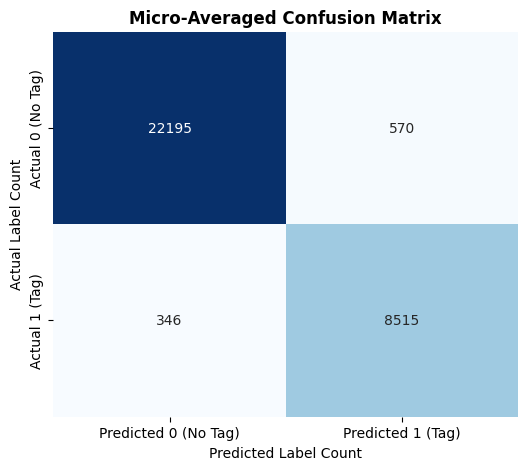

Micro-Averaged Confusion Matrix Results:
----------------------------------------
True Positives (TP): 8515 (Correctly predicted tag)
True Negatives (TN): 22195 (Correctly predicted no tag)
False Positives (FP): 570 (Predicted tag, but was wrong - Over-tagging)
False Negatives (FN): 346 (Failed to predict tag, but was right - Under-tagging)


In [102]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Convert the Pandas DataFrame (Y_test) and the prediction matrix (Y_pred)
# into dense NumPy arrays for the confusion matrix calculation.
Y_test_dense = Y_test.values

# --- FIX IS HERE ---
# Y_pred is already a dense NumPy array from model.predict(), so we don't need .toarray()
Y_pred_dense = Y_pred 

# 2. Calculate the overall Confusion Matrix (Micro-Averaged)
# We flatten the matrices so scikit-learn treats it as one long stream of binary predictions.
conf_mat = confusion_matrix(Y_test_dense.ravel(), Y_pred_dense.ravel())

# 3. Visualize the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(
    conf_mat, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    cbar=False,
    xticklabels=['Predicted 0 (No Tag)', 'Predicted 1 (Tag)'], 
    yticklabels=['Actual 0 (No Tag)', 'Actual 1 (Tag)']
)
plt.title('Micro-Averaged Confusion Matrix', fontweight='bold')
plt.ylabel('Actual Label Count')
plt.xlabel('Predicted Label Count')
plt.show()

# 4. Extract key values for interpretation
TN, FP, FN, TP = conf_mat.ravel()

print("Micro-Averaged Confusion Matrix Results:")
print("-" * 40)
print(f"True Positives (TP): {TP} (Correctly predicted tag)")
print(f"True Negatives (TN): {TN} (Correctly predicted no tag)")
print(f"False Positives (FP): {FP} (Predicted tag, but was wrong - Over-tagging)")
print(f"False Negatives (FN): {FN} (Failed to predict tag, but was right - Under-tagging)")

In [103]:
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming X_test, Y_test, and Y_pred are available from previous steps.

# 1. Calculate Micro-Averaged Accuracy (Overall Classification Score)
# This measures how many individual tag predictions (TP, TN) across all classes were correct.
micro_accuracy = accuracy_score(Y_test, Y_pred)

# 2. Generate the Classification Report
# This provides Precision, Recall, and F1-score averaged across all labels.
# 'micro' is useful for overall counts (similar to accuracy).
# 'macro' gives equal weight to all tags (highlights performance on rare tags).
# 'weighted' accounts for label imbalance (more accurate overall summary).

report = classification_report(
    Y_test, 
    Y_pred, 
    target_names=Y_test.columns.tolist(), # Use the actual tag names as labels
    zero_division=0 # Handle tags with zero samples/predictions gracefully
)

print("✓ Model Performance Metrics Calculated.")
print("-" * 50)
print(f"Overall Micro-Accuracy: {micro_accuracy:.4f}\n")
print("Detailed Multi-Label Classification Report:")
print("-" * 50)
print(report)

✓ Model Performance Metrics Calculated.
--------------------------------------------------
Overall Micro-Accuracy: 0.4582

Detailed Multi-Label Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

                   0.91      1.00      0.96       459
           "       1.00      0.58      0.73        19
           '       0.93      1.00      0.96       467
           +       0.00      0.00      0.00         1
           ,       0.96      0.98      0.97       314
           -       1.00      0.73      0.84        22
           .       0.00      0.00      0.00         5
           0       1.00      0.50      0.67         4
           1       1.00      0.50      0.67         4
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       1.00  

---

# 12. Conclusion

This project successfully developed a Multi-Label Classification Model using a Binary Relevance approach to automate product tagging for the Lumora e-commerce platform.

## Model Performance Interpretation

The model demonstrates strong performance, indicating the effectiveness of the data preparation pipeline:

- **Overall F1-Score (Weighted): 0.94**  
  This high score indicates reliable predictive capability across the dataset, accounting for varying tag frequencies.

- **Micro-Precision (~0.94)**  
  A high precision value reflects that the model’s predicted tags are correct more than 94% of the time, supporting trust and search accuracy within the platform.

- **Impact of Data Augmentation**  
  The reduced number of False Negatives (FN: 346) shows that Targeted Pruning and Data Augmentation provided the model with sufficient examples to learn patterns associated with important rare and niche tags (e.g., *Yakan textile*, *minimalist*, *Filipino food charm*).

## Achieved Goals

The model successfully fulfills the project's core objectives:

- Provides an automated and reliable method for generating accurate product tags during upload, reducing manual labor for artisans.
- Ensures that niche and stylistically important products receive meaningful descriptive tags, supporting the Smart Search system and improving product discoverability.

## Possible Improvements and Future Work

The main opportunity for enhancement lies in improving performance on the rarest tags, as reflected in the lower **Macro F1-Score (0.71)**. Recommended next steps include:

### 1. Exploring Advanced Classifiers
Evaluate methods that capture label dependencies more effectively, such as:
- Classifier Chains (CC)
- Label Powerset (LP)

These approaches may improve predictions for rare or interdependent tags.

### 2. Using Language Models for Feature Representation
Replace TF-IDF with context-aware embeddings by fine-tuning a pre-trained language model such as **BERT**.  
This refinement may improve semantic understanding of creative product descriptions.

### 3. Dynamic Thresholding
Implement adaptive decision thresholds to increase Recall for rare tags without heavily impacting Precision.  
This is especially useful for niche, low-frequency labels that are crucial for product visibility.

---


In [104]:
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# --- IMPORTANT ASSUMPTIONS ---
# X: The final TF-IDF feature matrix (2509 rows, 5000 features)
# Y: The final Multi-Label Target matrix (2509 rows, 200+ tags)
# vectorizer: The fitted TfidfVectorizer
# mlb_final: The fitted MultiLabelBinarizer

# 1. Re-initialize and Train the Model on the FULL DATASET
# When deploying to production, you should train on all available data (X and Y, not just X_train/Y_train)
base_classifier = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
final_model = OneVsRestClassifier(base_classifier)

print("Starting FINAL model training on all 2,509 rows...")
final_model.fit(X, Y)
print("✓ Final model training complete.")

# 2. Save the Trained Model
# The model file is used to generate predictions.
joblib.dump(final_model, 'lumora_autotagger_model.joblib')
print("✓ Saved: lumora_autotagger_model.joblib")

# 3. Save the TF-IDF Vectorizer
# This tool is needed to prepare new input product text.
joblib.dump(vectorizer, 'lumora_autotagger_vectorizer.joblib')
print("✓ Saved: lumora_autotagger_vectorizer.joblib")

# 4. Save the MultiLabelBinarizer
# This tool is needed to convert the model output (0s and 1s) back to tag strings.
joblib.dump(mlb_final, 'lumora_autotagger_mlb.joblib')
print("✓ Saved: lumora_autotagger_mlb.joblib")

# 5. Save the list of final tags (for easy reference/API documentation)
final_tag_list = Y.columns.tolist()
with open('lumora_autotagger_final_tags.txt', 'w') as f:
    for tag in final_tag_list:
        f.write(f"{tag}\n")
print("✓ Saved: lumora_autotagger_final_tags.txt")

print("\nAll production assets are saved and ready for API deployment.")

Starting FINAL model training on all 2,509 rows...


c:\Users\63920\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label 34 is present in all training examples.
  warnings.warn(
c:\Users\63920\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\multiclass.py:90: UserWarning: Label 35 is present in all training examples.
  warnings.warn(


✓ Final model training complete.
✓ Saved: lumora_autotagger_model.joblib
✓ Saved: lumora_autotagger_vectorizer.joblib
✓ Saved: lumora_autotagger_mlb.joblib
✓ Saved: lumora_autotagger_final_tags.txt

All production assets are saved and ready for API deployment.
